In [1]:
# %pip install sklearn

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf

print('TensorFlow Version:', tf.__version__)
print('Num GPUs Available:', len(tf.config.list_physical_devices('GPU')))
print('GPU Device:', tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.10.0
Num GPUs Available: 1
GPU Device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# %conda install -c conda-forge tensorflow-gpu -y

In [2]:
target_path = "A:\\DEPI-Data Science-\\Graduation Project\\EuroSAT\\2750"


In [3]:
os.listdir(target_path)

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your main directory containing the class folders
data_dir = target_path

# Define image dimensions and batch size
img_height = 64
img_width = 64
batch_size = 24
validation_split = 0.2  # Use 20% of the data for validation

# Create an ImageDataGenerator for training data with validation split and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split  # Specify the validation split
)

# Create an ImageDataGenerator for validation data (only rescaling, same split)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split
)

# Generate batches of augmented image data and labels for the training set
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',          # Specify that this is the training subset
    shuffle=True
)

# Generate batches of image data and labels for the validation set
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',        # Specify that this is the validation subset
    shuffle=False
)

# You can access the class labels
class_names = train_generator.class_indices
print("Class Names:", class_names)
print("Number of Classes:", len(class_names))
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)



Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Class Names: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Number of Classes: 10
Number of training samples: 21600
Number of validation samples: 5400


In [5]:

model_rgb = Sequential([
    Conv2D(32, (3, 3),input_shape=(64, 64, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_rgb.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model_rgb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [10]:
epochs=20
history = model_rgb.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/20
900/900 [==============================] - 41s 42ms/step - loss: 1.4211 - accuracy: 0.5251 - val_loss: 1.1438 - val_accuracy: 0.5824
Epoch 2/20
900/900 [==============================] - 40s 45ms/step - loss: 1.0097 - accuracy: 0.6586 - val_loss: 1.7034 - val_accuracy: 0.4387
Epoch 3/20
900/900 [==============================] - 26s 29ms/step - loss: 0.8723 - accuracy: 0.7104 - val_loss: 1.8062 - val_accuracy: 0.4978
Epoch 4/20
900/900 [==============================] - 26s 29ms/step - loss: 0.7834 - accuracy: 0.7462 - val_loss: 0.4833 - val_accuracy: 0.8430
Epoch 5/20
900/900 [==============================] - 26s 28ms/step - loss: 0.6855 - accuracy: 0.7847 - val_loss: 0.5467 - val_accuracy: 0.8133
Epoch 6/20
900/900 [==============================] - 24s 26ms/step - loss: 0.6034 - accuracy: 0.8125 - val_loss: 0.8161 - val_accuracy: 0.7319
Epoch 7/20
900/900 [==============================] - 25s 27ms/step - loss: 0.5571 - accuracy: 0.8312 - val_loss: 0.8823 - val_accuracy:

In [11]:
# --- Evaluating the Model (Optional) ---
print("\nEvaluating the model:")
loss, accuracy = model_rgb.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Evaluating the model:
225/225 [==============================] - 2s 10ms/step - loss: 0.4833 - accuracy: 0.8430
Validation Loss: 0.4833
Validation Accuracy: 0.8430


In [8]:
model_enhanced = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'), # Added layer
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    # Removed one MaxPooling2D here

    Conv2D(1024, (3, 3), activation='relu', padding='same'), # Added layer
    BatchNormalization(),
    # Removed another MaxPooling2D here

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [9]:
model_enhanced.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_enhanced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

In [14]:
epochs=20
history = model_enhanced.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
900/900 [==============================] - 26s 28ms/step - loss: 1.6074 - accuracy: 0.4919 - val_loss: 2.0379 - val_accuracy: 0.3817
Epoch 2/20
900/900 [==============================] - 25s 28ms/step - loss: 1.1452 - accuracy: 0.6236 - val_loss: 0.9985 - val_accuracy: 0.6304
Epoch 3/20
900/900 [==============================] - 25s 28ms/step - loss: 0.9879 - accuracy: 0.6800 - val_loss: 1.6434 - val_accuracy: 0.5507
Epoch 4/20
900/900 [==============================] - 26s 28ms/step - loss: 0.9272 - accuracy: 0.7021 - val_loss: 0.7531 - val_accuracy: 0.7583
Epoch 5/20
900/900 [==============================] - 26s 29ms/step - loss: 0.8205 - accuracy: 0.7425 - val_loss: 0.7345 - val_accuracy: 0.7602
Epoch 6/20
900/900 [==============================] - 26s 29ms/step - loss: 0.7516 - accuracy: 0.7676 - val_loss: 1.1471 - val_accuracy: 0.6389
Epoch 7/20
900/900 [==============================] - 26s 29ms/step - loss: 0.6425 - accuracy: 0.8041 - val_loss: 2.4728 - val_accuracy:

In [15]:
# --- Evaluating the Model (Optional) ---
print("\nEvaluating the model:")
loss, accuracy = model_enhanced.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Evaluating the model:
225/225 [==============================] - 2s 10ms/step - loss: 0.2639 - accuracy: 0.9139
Validation Loss: 0.2639
Validation Accuracy: 0.9139


In [18]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.5 MB 1.4 MB/s eta 0:00:05
   ---- ----------------------------------- 0.8/7.5 MB 1.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.5 MB 1.5 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.5 MB 1.6 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/7.5 MB 1.6 MB/s eta 0:00:04
   ----------- ---------------------------- 2.1/7.5 MB 1.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.1/7.5 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.4/7.5 MB 1.4 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/7.5 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------ 2.9/7.5 MB 1.3 MB/s eta 0:00:04
   ---------------- ------------------

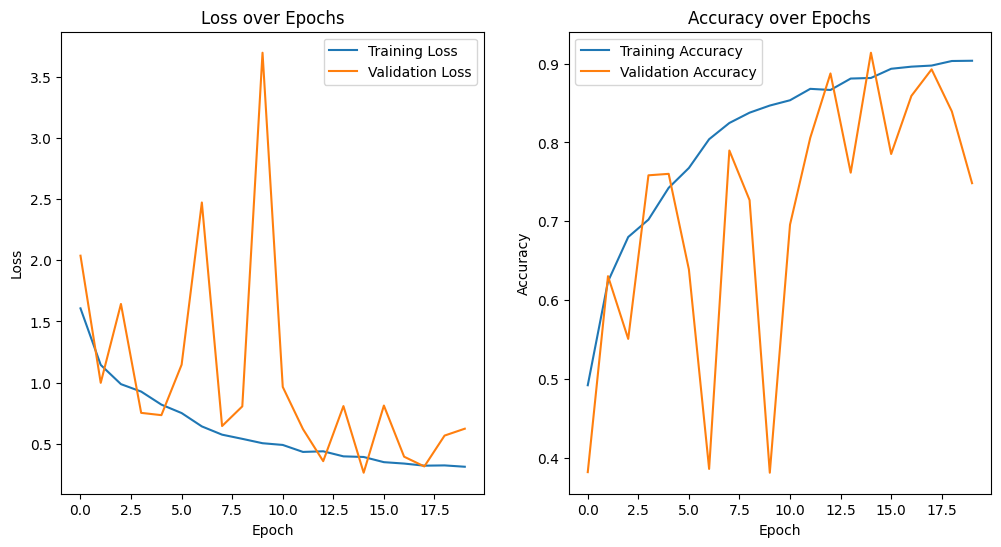

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model_enhanced.save('model_v1.h5')

In [11]:
model_enhanced_v2 = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'), # Added Conv
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Added Conv
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Added Conv
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Added Conv
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'), # Increased units
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [12]:
model_enhanced_v2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_enhanced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

In [26]:
epochs=40
history = model_enhanced_v2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/40
900/900 [==============================] - 27s 29ms/step - loss: 1.7278 - accuracy: 0.4484 - val_loss: 1.1911 - val_accuracy: 0.5215
Epoch 2/40
900/900 [==============================] - 27s 30ms/step - loss: 1.1871 - accuracy: 0.5963 - val_loss: 0.8581 - val_accuracy: 0.6863
Epoch 3/40
900/900 [==============================] - 45s 50ms/step - loss: 0.9688 - accuracy: 0.6734 - val_loss: 1.3861 - val_accuracy: 0.6085
Epoch 4/40
900/900 [==============================] - 25s 28ms/step - loss: 0.8551 - accuracy: 0.7147 - val_loss: 0.8580 - val_accuracy: 0.7233
Epoch 5/40
900/900 [==============================] - 26s 29ms/step - loss: 0.7914 - accuracy: 0.7445 - val_loss: 1.0830 - val_accuracy: 0.6248
Epoch 6/40
900/900 [==============================] - 60s 66ms/step - loss: 0.7195 - accuracy: 0.7754 - val_loss: 0.6796 - val_accuracy: 0.7778
Epoch 7/40
900/900 [==============================] - 42s 46ms/step - loss: 0.6501 - accuracy: 0.8024 - val_loss: 0.7199 - val_accuracy:

In [27]:
# --- Evaluating the Model (Optional) ---
print("\nEvaluating the model:")
loss, accuracy = model_enhanced_v2.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Evaluating the model:
225/225 [==============================] - 2s 10ms/step - loss: 0.2499 - accuracy: 0.9217
Validation Loss: 0.2499
Validation Accuracy: 0.9217


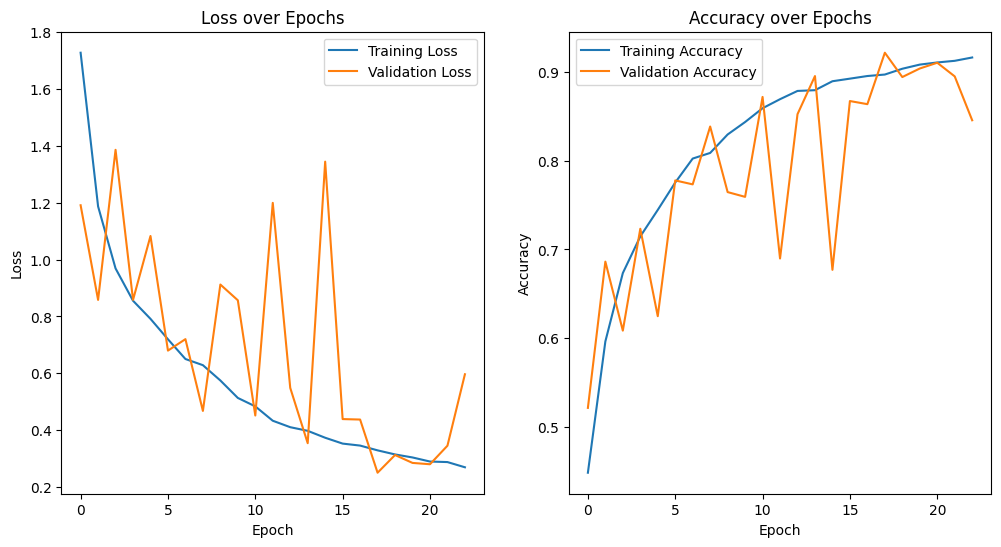

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
model_enhanced.save('model_v2.h5')